# Importation des librairies

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import nltk 

# Exploration des données 

In [2]:
data=pd.read_csv('SPAM_Text_Message.csv') 
data.head() 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

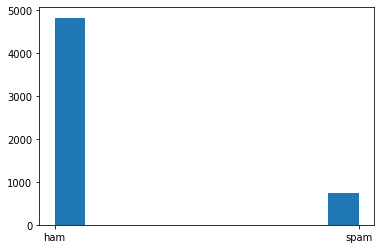

In [4]:
plt.hist(data['Category']) 

In [5]:
data['length'] = data['Message'].apply(len) 
data.head() 

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Category
ham     AxesSubplot(0.125,0.125;0.775x0.755)
spam    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

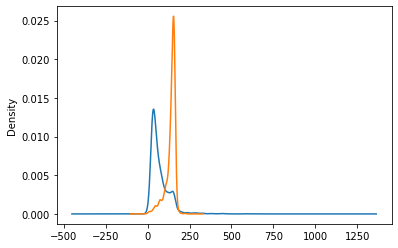

In [6]:
data.groupby("Category").length.plot(kind='kde')

#  Pré-traitement des données

**suppression de la ponctuation**

In [7]:
def remove_punct(text): 
  return ("".join([ch for ch in text if ch not in st.punctuation])) 

In [8]:
import string as st 
data['removed_punc'] = data['Message'].apply(lambda x: remove_punct(x)) 
data.head() 

,Category,Message,length,removed_punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...


**conversion du texte en tokens**

In [9]:
def tokenize(text): 
 text = re.split('\s+' ,text) 
 return [x.lower() for x in text] 

In [10]:
import re 
data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg)) 
data.head() 


,Category,Message,length,removed_punc,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


**suppression des tokens de longueur inférieure ou égale à 3**

In [11]:
def remove_small_words(text): 
 return [x for x in text if len(x) > 3 ] 

In [12]:
data['larger_tokens'] = data['tokens'].apply(lambda x : 
remove_small_words(x)) 
data.head() 


,Category,Message,length,removed_punc,tokens,larger_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]"


**suppression des mots vides à l'aide 
de la liste des mots vides du corpus NLTK**

In [13]:
def remove_stopwords(text): 
 return [word for word in text if word not in 
nltk.corpus.stopwords.words('english')]

In [14]:
import nltk 
nltk.download('stopwords') 
data['clean_tokens'] = data['larger_tokens'].apply(lambda x : 
remove_stopwords(x)) 
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,length,removed_punc,tokens,larger_tokens,clean_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]"


**application de la racinisation (stemming)**

In [15]:
def stemming(text): 
 ps = PorterStemmer() 
 return [ps.stem(word) for word in text] 

In [16]:
from nltk import PorterStemmer, WordNetLemmatizer 
data['stem_words'] = data['clean_tokens'].apply(lambda wrd: stemming(wrd)) 
data.head() 

,Category,Message,length,removed_punc,tokens,larger_tokens,clean_tokens,stem_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20..."
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]"


**application de la lemmatisation.**

In [17]:
def lemmatize(text): 
 word_net = WordNetLemmatizer() 
 return [word_net.lemmatize(word) for word in text] 

In [18]:
nltk.download('wordnet') 
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x)) 
data.head() 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message,length,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]"


In [19]:
def return_sentences(tokens): 
 return " ".join([word for word in tokens])

In [20]:
data['clean_text'] = data['lemma_words'].apply(lambda x : 
return_sentences(x)) 
data.head() 

,Category,Message,length,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]",dont think go life around though


# Extraction des descripteurs

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf = TfidfVectorizer() 
tfidf_vect = tfidf.fit_transform(data['clean_text']) 
tfidf_vect.shape 

(5572, 7912)

# Classification HAM/SPAM

**Conversion des noms des classes en information binaire**

In [25]:
data['Category'] = [1 if x == 'spam' else 0 for x in data['Category']] 
data.head()

,Category,Message,length,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,0,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]",dont think go life around though


**Partitionnement de la base de données en données de test et données d’apprentissage**

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix 

text_train, text_test, y_train, y_test = train_test_split(data['clean_text'], data['Category'], test_size = 0.2) 
print(text_train.shape) 
print(text_test.shape)

(4457,)
(1115,)


**Conversion de l’information pré-traitée en vecteurs Tfidf**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() 
X_train = tfidf.fit_transform(text_train) 
X_test = tfidf.transform(text_test) 
print(X_train.toarray()) 
print(X_train.shape) 
print(X_test.toarray())
print(X_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4457, 6949)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1115, 6949)


**Apprentissage de Bayes Naïf**

In [30]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline

#Creating the model based in Multinomial Naive Bayes 
model=make_pipeline(TfidfVectorizer(),MultinomialNB()) 

model.fit(text_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

**Test et résultats**

Text(89.18, 0.5, 'Predicted label')

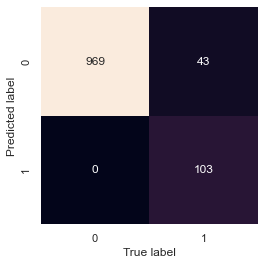

In [31]:
#Creating labels for test data 
labels=model.predict(text_test) 

from sklearn.metrics import confusion_matrix 
import seaborn as sns; sns.set() #data visualization library; default configuration 

mat=confusion_matrix(y_test,labels) 
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False) 
plt.xlabel('True label') 
plt.ylabel('Predicted label') 

**Test sur de Nouvelles données**